In [1]:
import numpy as np

In [104]:
N = 1024

In [105]:
A = np.random.randint(-20, 20, (N, N))

with open('A_data', 'w+') as f:
    for x in A.flatten():
        f.write(str(x) + " ")

In [106]:
B = np.random.randint(-20, 20, (N, N))

with open('B_data', 'w+') as f:
    for x in B.flatten():
        f.write(str(x) + " ")

In [109]:
with open('C_data', 'r') as f:
    C_data = f.readline().split(' ')
    C_data = [int(x) for x in C_data if len(x) > 0]
    C = np.array(C_data).reshape((N, N))

In [110]:
(np.matmul(A, B) == C).all()

True

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [418]:
# cache_lst = [12, 16, 18, 20, 21, 22, 23, 24]
# cache_lst = range(12, 29, 4)
cache_lst = range(12, 23, 2)
algo_lst = ['naive', 'transposed', 'recursive']
i_list = range(3)

In [419]:
data = dict()
usr_time_data = dict()
wall_time_data = dict()

for cache in cache_lst:
    for alg in algo_lst:
        for i in i_list:
            data[cache, alg, i] = np.nan
            usr_time_data[cache, alg, i] = np.nan
            wall_time_data[cache, alg, i] = np.nan
            try:
                with open(f'./logs/{alg}_{cache}_{i}', 'r') as f:
                    for ln in f.readlines():
                        if ln.startswith('\tMajor (requiring I/O) page faults:'):
                            x = int(ln.split(':')[1].strip())
                            data[cache, alg, i] = x
                        elif ln.startswith('\tUser time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            usr_time_data[cache, alg, i] = x
                        elif ln.startswith('\tSystem time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            wall_time_data[cache, alg, i] = x
            except FileNotFoundError:
                pass

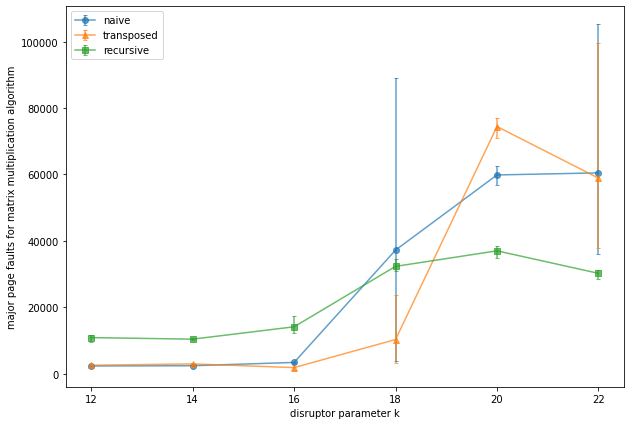

In [420]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[data[cache, alg, i] for i in i_list] for cache in cache_lst]
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg, alpha=0.7, capsize=2)
plt.xlabel('disruptor parameter k')
plt.ylabel('major page faults for matrix multiplication algorithm')
plt.legend()

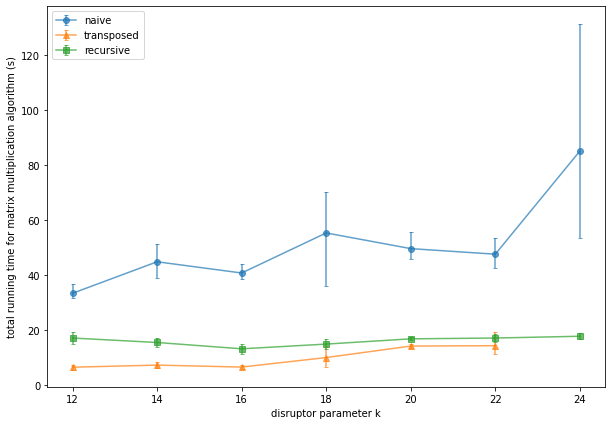

In [417]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[usr_time_data[cache, alg, i] + wall_time_data[cache, alg, i] for i in i_list] for cache in cache_lst]
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg, alpha=0.7, capsize=2)
plt.xlabel('disruptor parameter k')
plt.ylabel('total running time for matrix multiplication algorithm (s)')
plt.legend()

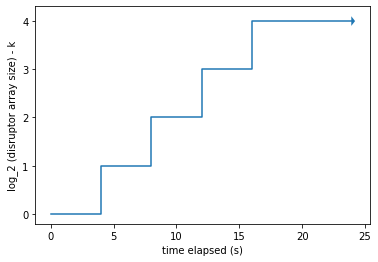

In [394]:
plt.step([0, 4, 8, 12, 16, 24], [0, 1, 2, 3, 4, 4], where='post')
plt.arrow(24, 4, 0.2, 0, lw=0, length_includes_head=True, head_width=0.2, color='C0')
plt.xlabel('time elapsed (s)')
plt.ylabel('log_2 (disruptor array size) - k')
plt.show()